In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe


#### 1. Read Dataset

In [2]:
df = pd.read_csv(r"Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Check Dataset Info & Check Nan values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Remove Duplicate

In [15]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(25480, 12)

#### Drop the Case_id 

In [4]:
df.drop(columns=['case_id'],inplace=True)

In [5]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [24]:
from datetime import date
present_year = date.today().year

In [26]:
df['Company_Age'] = present_year-df['yr_of_estab']

In [28]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Company_Age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


#### remove yr_of_estab column

In [31]:

df.drop(columns=['yr_of_estab'],inplace=True)

In [33]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Company_Age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


#### Type of features

In [6]:
Categorical_features = df.select_dtypes(include='O').columns.to_list()
Numerical_features = df.select_dtypes(exclude='O').columns.to_list()
Discrete_features = [feature for feature in Numerical_features if df[feature].nunique()<25 ]
Continues_features = [feature for feature in Numerical_features if df[feature].nunique()>25 ]

print(f'Categorical_features {Categorical_features}')
print(f'Numerical_features {Numerical_features}')
print(f'Discrete_features {Discrete_features}')
print(f'Continues_features {Continues_features}')

Categorical_features ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Numerical_features ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Discrete_features []
Continues_features ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [9]:
Categorical_features[:-1]

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [12]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [14]:
# Encode categorical columns using LabelEncoder
from sklearn.feature_selection import SelectKBest


encoder = LabelEncoder()
encoded_data = df[Categorical_features].apply(encoder.fit_transform)

# Separate features and target
X = encoded_data.drop('case_status', axis=1)  # Features
y = encoded_data['case_status']               # Target

# Perform Chi-Square test
chi2_stats, p_values = chi2(X, y)

# Create a DataFrame for easy visualization of results
chi2_results = pd.DataFrame({'Feature': X.columns, 
                             'Chi2 Statistic': chi2_stats, 
                             'p-value': p_values}).sort_values(by='Chi2 Statistic', ascending=False)

SelectKBest(chi2)


,Feature,Chi2 Statistic,p-value
2,has_job_experience,394.300174,9.588203e-88
1,education_of_employee,315.384706,1.466340e-70
5,unit_of_wage,286.675321,2.636259e-64
4,region_of_employment,33.291681,7.932124e-09
0,continent,5.112036,2.376042e-02
3,requires_job_training,1.598242,2.061526e-01
6,full_time_position,0.437397,5.083817e-01


In [17]:
# Apply Chi-Square test
chi2_selector = SelectKBest(chi2, k=3)  # Select the top 10 features
X_selected = chi2_selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[chi2_selector.get_support()]
print("Top 10 Features:", selected_features)

Top 10 Features: Index(['education_of_employee', 'has_job_experience', 'unit_of_wage'], dtype='object')


In [18]:
chi2_selector.get_support()

array([False,  True,  True, False, False,  True, False])

In [7]:
df[Numerical_features].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


### Split X & y

In [39]:
X = df.drop(columns=['case_status'])
y = df[['case_status']]

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [43]:
od_encoder = OrdinalEncoder()

In [45]:
encoded_y = od_encoder.fit_transform(y)
encoded_y

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

#### Work on X
-  need to encode the categorical features.
-  numerical features are skewed so find skewness apply tranformation

In [48]:
categorical_features = X.select_dtypes(include='O').columns.to_list()
print(f'categorical_features : {categorical_features}')


numerical_features = X.select_dtypes(exclude='O').columns.to_list()
print(f'numerical_features : {numerical_features}')

on_encoding_features = []
od_encoding_features = []
for feature in categorical_features:
    if X[feature].nunique()>2:
        od_encoding_features.append(feature)
    else:
        on_encoding_features.append(feature)

print(f'onehot_encoding_features: {on_encoding_features}')
print(f'odinal_encoding_features: {od_encoding_features}')

categorical_features : ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']
numerical_features : ['no_of_employees', 'prevailing_wage', 'Company_Age']
onehot_encoding_features: ['has_job_experience', 'requires_job_training', 'full_time_position']
odinal_encoding_features: ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']


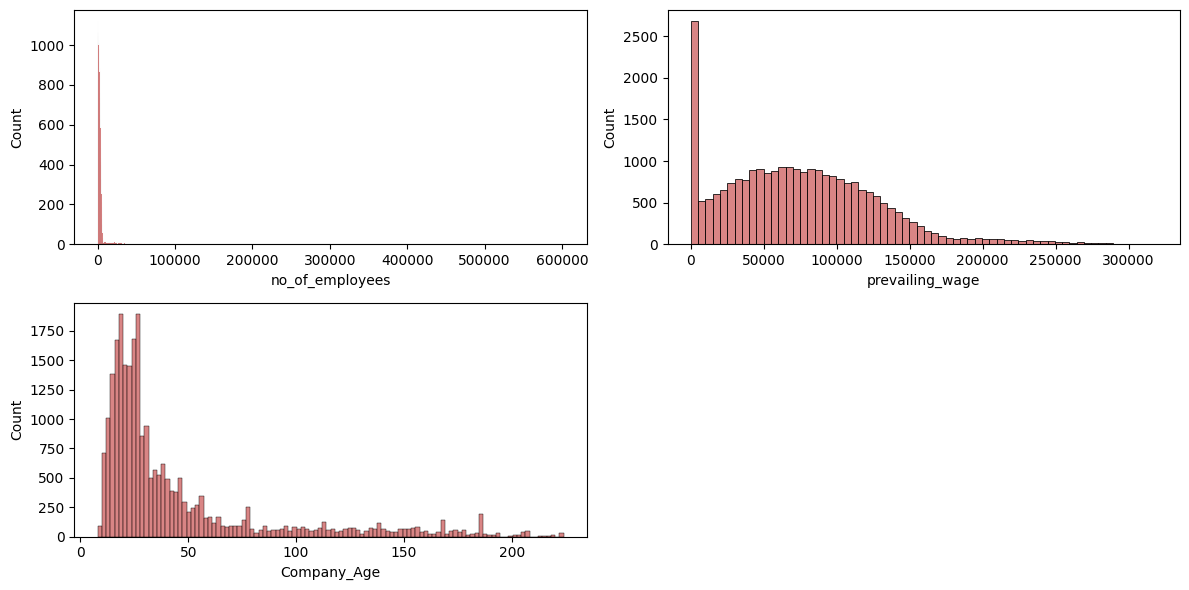

In [21]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [50]:
X[numerical_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
Company_Age         2.037301
dtype: float64

In [52]:
from sklearn.preprocessing import PowerTransformer,OneHotEncoder,StandardScaler
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Company_Age', 'no_of_employees']

In [54]:
X_copy = pt.fit_transform(X[transform_features])

In [56]:
pd.DataFrame(X_copy, columns=transform_features).skew()

Company_Age        0.103264
no_of_employees    0.399339
dtype: float64

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [60]:
tranformation = Pipeline(steps=[
    ('powertranformation',PowerTransformer(method='yeo-johnson'))
])

preprocessing = ColumnTransformer([
    ('onehot_encoding',OneHotEncoder(),on_encoding_features),
    ('ordinal_encoding',OrdinalEncoder(),od_encoding_features),
    ('powertranformation',tranformation,transform_features),
    ('scaling',StandardScaler(),numerical_features)
])

In [62]:
preprocessing_X = preprocessing.fit_transform(X)

In [64]:
from imblearn.combine import  SMOTEENN

In [66]:
smoten = SMOTEENN()

res_x,res_y = smoten.fit_resample(preprocessing_X,encoded_y)

In [67]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(res_x,res_y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13611, 15), (3403, 15))

In [111]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix 
from xgboost import XGBClassifier



In [ ]:
model_list = {
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier' :KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier()
}

In [97]:
def model_evalution(y_true,y_pred):
    acc_score = accuracy_score(y_true,y_pred)
    preci_score = precision_score(y_true,y_pred)
    recall_score_ = recall_score(y_true,y_pred)
    f1_score_ = f1_score(y_true,y_pred)
    auc_score = roc_auc_score(y_true,y_pred)
    
    return {'accuracy_score':acc_score,
            'precision_score':preci_score,
            'recall_score':recall_score_,
            'f1_score':f1_score_,
            'roc_auc_scor':auc_score}
    
    

In [35]:
model_evalution_data = {}
for model_ in model_list:
    model = model_list[model_]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores = model_evalution(y_test,y_pred)
    scores['training_acc_score'] = model.score(X_train,y_train)
    scores['test_acc_score'] = model.score(X_test,y_test)
    model_evalution_data[model_] = scores
    print(f'{model_} training completed....')
    

LogisticRegression training completed....
AdaBoostClassifier training completed....
RandomForestClassifier training completed....
KNeighborsClassifier training completed....
DecisionTreeClassifier training completed....
SVC training completed....
XGBClassifier training completed....
Learning rate set to 0.031524
0:	learn: 0.6625124	total: 200ms	remaining: 3m 19s
1:	learn: 0.6348111	total: 207ms	remaining: 1m 43s
2:	learn: 0.6099829	total: 213ms	remaining: 1m 10s
3:	learn: 0.5878953	total: 218ms	remaining: 54.3s
4:	learn: 0.5676854	total: 224ms	remaining: 44.5s
5:	learn: 0.5485037	total: 229ms	remaining: 37.9s
6:	learn: 0.5321527	total: 234ms	remaining: 33.2s
7:	learn: 0.5174206	total: 239ms	remaining: 29.7s
8:	learn: 0.5016125	total: 245ms	remaining: 26.9s
9:	learn: 0.4874873	total: 249ms	remaining: 24.7s
10:	learn: 0.4753252	total: 254ms	remaining: 22.9s
11:	learn: 0.4648826	total: 259ms	remaining: 21.3s
12:	learn: 0.4549158	total: 264ms	remaining: 20s
13:	learn: 0.4445478	total: 269m

In [38]:
models_evalution_dataframe = pd.DataFrame(model_evalution_data).T

In [40]:
models_evalution_dataframe.sort_values(['roc_auc_scor'],ascending=False)

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_scor,training_acc_score,test_acc_score
RandomForestClassifier,0.946387,0.950079,0.953084,0.951579,0.945597,1.000000,0.946387
KNeighborsClassifier,0.934149,0.922610,0.961518,0.941662,0.930922,0.965899,0.934149
XGBClassifier,0.929779,0.935331,0.937797,0.936562,0.928833,0.977558,0.929779
CatBoostClassifier,0.926282,0.936306,0.929889,0.933086,0.925857,0.952346,0.926282
DecisionTreeClassifier,0.915501,0.925808,0.920928,0.923362,0.914861,1.000000,0.915501
AdaBoostClassifier,0.859266,0.870545,0.875593,0.873062,0.857340,0.861119,0.859266
SVC,0.801573,0.820000,0.821297,0.820648,0.799248,0.800714,0.801573
LogisticRegression,0.723776,0.759431,0.732209,0.745572,0.722782,0.718304,0.723776


#### Go for top 3 models

In [41]:
top_model_list = {
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier' :KNeighborsClassifier(),
    'XGBClassifier':XGBClassifier(),
}

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize a RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
Best parameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.9504662004662005


In [44]:
scores = model_evalution(y_test,y_pred)
scores['training_acc_score'] = model.score(X_train,y_train)
scores['test_acc_score'] = model.score(X_test,y_test)

scores

{'accuracy_score': 0.9504662004662005,
 'precision_score': 0.9542346133613887,
 'recall_score': 0.9562467053241961,
 'f1_score': 0.9552395997893628,
 'roc_auc_scor': 0.9497845904471144,
 'training_acc_score': 0.9523462547362285,
 'test_acc_score': 0.9262820512820513}

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2]
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize GridSearchCV with the KNeighborsClassifier
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best estimator
best_knn = grid_search.best_estimator_

# Evaluate the model
y_pred = best_knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# Additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
training_acc = accuracy_score(y_train, best_knn.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Training Accuracy: {training_acc}")
print(f"Test Accuracy: {test_acc}")


Fitting 5 folds for each of 112 candidates, totalling 560 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
F1 Score: 0.9617252504288104
ROC-AUC Score: 0.9857105081055465
Accuracy: 0.9618298368298368
Precision: 0.9625092304824019
Recall: 0.9618298368298368
Training Accuracy: 1.0
Test Accuracy: 0.9618298368298368


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11, 13],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())
])

# Define the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best estimator
best_knn = grid_search.best_estimator_

# Evaluate the model
y_pred = best_knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
training_acc = accuracy_score(y_train, best_knn.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

# Print the results
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Training Accuracy: {training_acc}")
print(f"Test Accuracy: {test_acc}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
F1 Score: 0.9496881313573317
ROC-AUC Score: 0.9842528662606311
Accuracy: 0.9498834498834499
Precision: 0.9510804972292721
Recall: 0.9498834498834499
Training Accuracy: 1.0
Test Accuracy: 0.9498834498834499


In [76]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'eta': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [0, 1, 10],
    'alpha': [0, 1, 10]
}

xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='auc')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
{'alpha': 1, 'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0, 'lambda': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0}


In [85]:
print(f'training score:{grid_search.score(X_train,y_train)}')
print(f'test score:{grid_search.score(X_test,y_test)}')

training score:0.9999784221615223
test score:0.9840087882984043


In [87]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'eta': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [5, 10, 15],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 10, 100],
    'alpha': [0, 1, 10]
}

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='auc')

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best AUC Score:", best_score)

# Train the final model with best parameters and early stopping
final_params = best_params
final_params['objective'] = 'binary:logistic'
final_params['eval_metric'] = 'auc'

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

evals = [(dtest, 'eval'), (dtrain, 'train')]

# Use early stopping to prevent overfitting
final_model = xgb.train(final_params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=50)

# Evaluate the model on the test set
test_score = final_model.eval(dtest, 'eval')
print("Final Test Score:", test_score)


Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
Best Parameters: {'alpha': 0, 'colsample_bytree': 0.7, 'eta': 0.1, 'gamma': 0, 'lambda': 1, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.7}
Best AUC Score: 0.9643423745409802
[0]	eval-auc:0.92049	train-auc:0.91915
[1]	eval-auc:0.92789	train-auc:0.92854
[2]	eval-auc:0.93453	train-auc:0.93704
[3]	eval-auc:0.94259	train-auc:0.94376
[4]	eval-auc:0.93801	train-auc:0.93854
[5]	eval-auc:0.93505	train-auc:0.93550
[6]	eval-auc:0.93958	train-auc:0.94057
[7]	eval-auc:0.94241	train-auc:0.94373
[8]	eval-auc:0.94436	train-auc:0.94566
[9]	eval-auc:0.94585	train-auc:0.94738
[10]	eval-auc:0.94650	train-auc:0.94828
[11]	eval-auc:0.94739	train-auc:0.94878
[12]	eval-auc:0.94883	train-auc:0.95003
[13]	eval-auc:0.94877	train-auc:0.94986
[14]	eval-auc:0.94935	train-auc:0.95058
[15]	eval-auc:0.94984	train-auc:0.95069
[16]	eval-auc:0.94995	train-auc:0.95052
[17]	eval-auc:0.95104	train-auc:0.95153
[18]	eval-auc:0.95099	train-auc:0.95156


In [89]:
ds_tree = DecisionTreeClassifier()

In [91]:
ds_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
ds_tree.score(X_train,y_train)


1.0

In [95]:
ds_tree.score(X_test,y_test)

0.9162503673229503

In [103]:
y_pred = ds_tree.predict(X_test)

In [107]:
ds_tree.classes_

array([0., 1.])

In [113]:
cm = confusion_matrix(y_test, y_pred, labels=ds_tree.classes_)

In [115]:
cm

array([[1403,  159],
       [ 126, 1715]], dtype=int64)

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

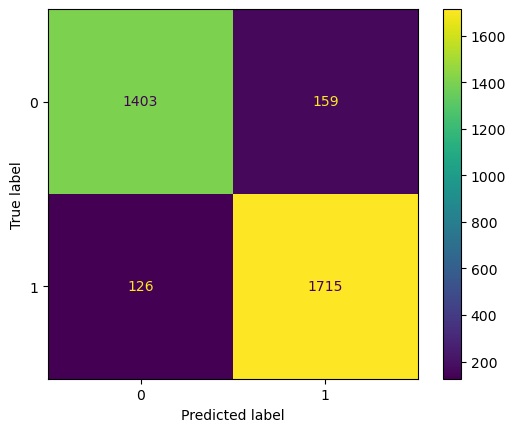

In [127]:
dist = ConfusionMatrixDisplay(cm)
dist.plot()


In [133]:
classification_report(y_test, y_pred).split('\n')

['              precision    recall  f1-score   support',
 '',
 '         0.0       0.92      0.90      0.91      1562',
 '         1.0       0.92      0.93      0.92      1841',
 '',
 '    accuracy                           0.92      3403',
 '   macro avg       0.92      0.91      0.92      3403',
 'weighted avg       0.92      0.92      0.92      3403',
 '']

In [137]:
# plot Decision Tree

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(ds_tree,filled=True)
plt.savefig(r"C:\Users\RAVEEN\Downloads\decisition_tree.png")
plt.close()


In [139]:
path = ds_tree.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.00000000e+00, 4.76562081e-05, 4.82264533e-05, 4.82802775e-05,
        4.83677418e-05, 4.84901918e-05, 4.85785163e-05, 4.86060986e-05,
        4.88641997e-05, 5.51024906e-05, 5.51024906e-05, 5.51024906e-05,
        5.86215092e-05, 5.87759900e-05, 5.87759900e-05, 6.12249896e-05,
        6.12249896e-05, 6.12249896e-05, 6.22666989e-05, 6.26491066e-05,
        6.29742750e-05, 6.29742750e-05, 6.29742750e-05, 6.29742750e-05,
        6.29742750e-05, 6.42862391e-05, 6.46519523e-05, 6.53666801e-05,
        6.61229888e-05, 6.61229888e-05, 6.67908977e-05, 6.67908977e-05,
        6.67908977e-05, 6.73474886e-05, 6.73474886e-05, 6.73474886e-05,
        6.73474886e-05, 6.73474886e-05, 6.78184500e-05, 6.78184500e-05,
        6.82221313e-05, 6.82221313e-05, 6.82221313e-05, 6.85719883e-05,
        6.85719883e-05, 6.85719883e-05, 6.85719883e-05, 6.87299883e-05,
        6.88781133e-05, 6.91482235e-05, 6.91482235e-05, 6.93883215e-05,
        6.93883215e-05, 6.97964881e-05, 6.97964881

In [149]:
ccp_alphas = path['ccp_alphas']

In [145]:
clsfs = []

for ccp_ap in path['ccp_alphas']:
    clf  = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_ap)
    clf.fit(X_train,y_train)
    clsfs.append(clf)

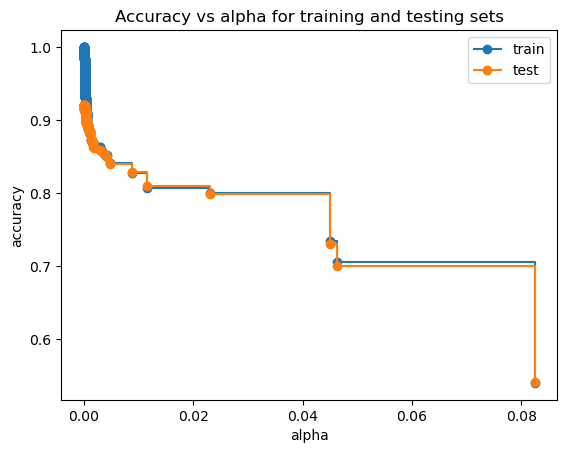

In [151]:
train_scores = [clf.score(X_train, y_train) for clf in clsfs]
test_scores = [clf.score(X_test, y_test) for clf in clsfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [169]:
clf  = DecisionTreeClassifier(random_state=0,ccp_alpha=0.00067526834121999911)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0006752683412199991, random_state=0)

In [171]:
clf.score(X_train,y_train)

0.8934685181103519

In [173]:
clf.score(X_test,y_test)

0.8921539817807816

In [161]:
ccp_alphas.sort()

In [167]:
ccp_alphas.mean()

0.0006752683412199991